In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_ry_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          8.2682 ( 8.0987,  8.3314) ( 8.1388,  8.3379)  0.1991 (Jnode 106)\n',
 't_n56          8.2226 ( 8.0313,  8.3194) ( 8.0719,  8.3303)  0.2584 (Jnode 105)\n',
 't_n57          7.7919 ( 7.5914,  7.9326) ( 7.6221,  7.9500)  0.3279 (Jnode 104)\n',
 't_n58          6.7666 ( 6.5548,  6.9457) ( 6.5677,  6.9532)  0.3855 (Jnode 103)\n',
 't_n59          6.5770 ( 6.3673,  6.7579) ( 6.3838,  6.7706)  0.3868 (Jnode 102)\n',
 't_n60          6.3220 ( 6.1134,  6.5044) ( 6.1253,  6.5120)  0.3868 (Jnode 101)\n',
 't_n61          5.9615 ( 5.7544,  6.1486) ( 5.7585,  6.1513)  0.3928 (Jnode 100)\n',
 't_n62          2.8109 ( 2.4481,  3.1638) ( 2.4374,  3.1509)  0.7135 (Jnode 99)\n',
 't_n63          4.6222 ( 4.4319,  4.8098) ( 4.4305,  4.8080)  0.3775 (Jnode 98)\n',
 't_n64          3.6769 ( 3.5123,  3.8444) ( 3.5131,  3.8450)  0.3319 (Jnode 97)\n',
 't_n65          3.3700 ( 3.2170,  3.5264) ( 3.2246,  3.5327)  0.3081 (Jnode 96)\n',
 't_n66          2.8476 ( 2.7189,  2.9821) ( 2.7163,  2.97

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[8.2682,
 8.2226,
 7.7919,
 6.7666,
 6.577,
 6.322,
 5.9615,
 2.8109,
 4.6222,
 3.6769,
 3.37,
 2.8476,
 2.1953,
 1.6611,
 0.674,
 3.6427,
 6.4214,
 6.1366,
 5.8815,
 4.2828,
 3.8596,
 3.3718,
 6.2554,
 5.9755,
 5.7411,
 5.4037,
 4.9551,
 4.8076,
 4.2367,
 3.8774,
 3.5799,
 2.7243,
 2.5056,
 4.2737,
 3.4899,
 6.1458,
 1.5829,
 5.9736,
 5.616,
 5.0681,
 4.7216,
 3.528,
 4.0184,
 4.8377,
 4.6477,
 4.2972,
 3.2813,
 4.2189,
 7.0888,
 5.3251,
 3.3909,
 2.5576,
 5.5361]

In [7]:
lower_ci_iqtree

[8.0987,
 8.0313,
 7.5914,
 6.5548,
 6.3673,
 6.1134,
 5.7544,
 2.4481,
 4.4319,
 3.5123,
 3.217,
 2.7189,
 2.1118,
 1.6489,
 0.5913,
 3.4136,
 6.2076,
 5.8777,
 5.6607,
 3.9798,
 3.5442,
 2.9554,
 6.0447,
 5.7598,
 5.5197,
 5.1788,
 4.7362,
 4.5842,
 4.0092,
 3.6541,
 3.3569,
 2.5173,
 2.3033,
 4.0297,
 3.2437,
 5.9323,
 1.1372,
 5.7578,
 5.4058,
 4.848,
 4.4995,
 3.2672,
 3.7796,
 4.6125,
 4.4193,
 4.0482,
 3.0048,
 3.9031,
 6.8598,
 4.9576,
 2.9723,
 2.1157,
 5.0307]

In [8]:
upper_ci_iqtree

[8.3314,
 8.3194,
 7.9326,
 6.9457,
 6.7579,
 6.5044,
 6.1486,
 3.1638,
 4.8098,
 3.8444,
 3.5264,
 2.9821,
 2.2869,
 1.6938,
 0.7614,
 3.8723,
 6.6103,
 6.3683,
 6.0828,
 4.5712,
 4.1696,
 3.7637,
 6.443,
 6.172,
 5.9429,
 5.6118,
 5.1648,
 5.0224,
 4.4544,
 4.0918,
 3.7946,
 2.9294,
 2.7117,
 4.5032,
 3.7389,
 6.3369,
 1.8826,
 6.1676,
 5.8093,
 5.2733,
 4.9331,
 3.7801,
 4.2515,
 5.0507,
 4.8708,
 4.5384,
 3.5518,
 4.5169,
 7.2832,
 5.6659,
 3.8076,
 3.0245,
 5.9949]

In [9]:
file_LG = open("LG_ry_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

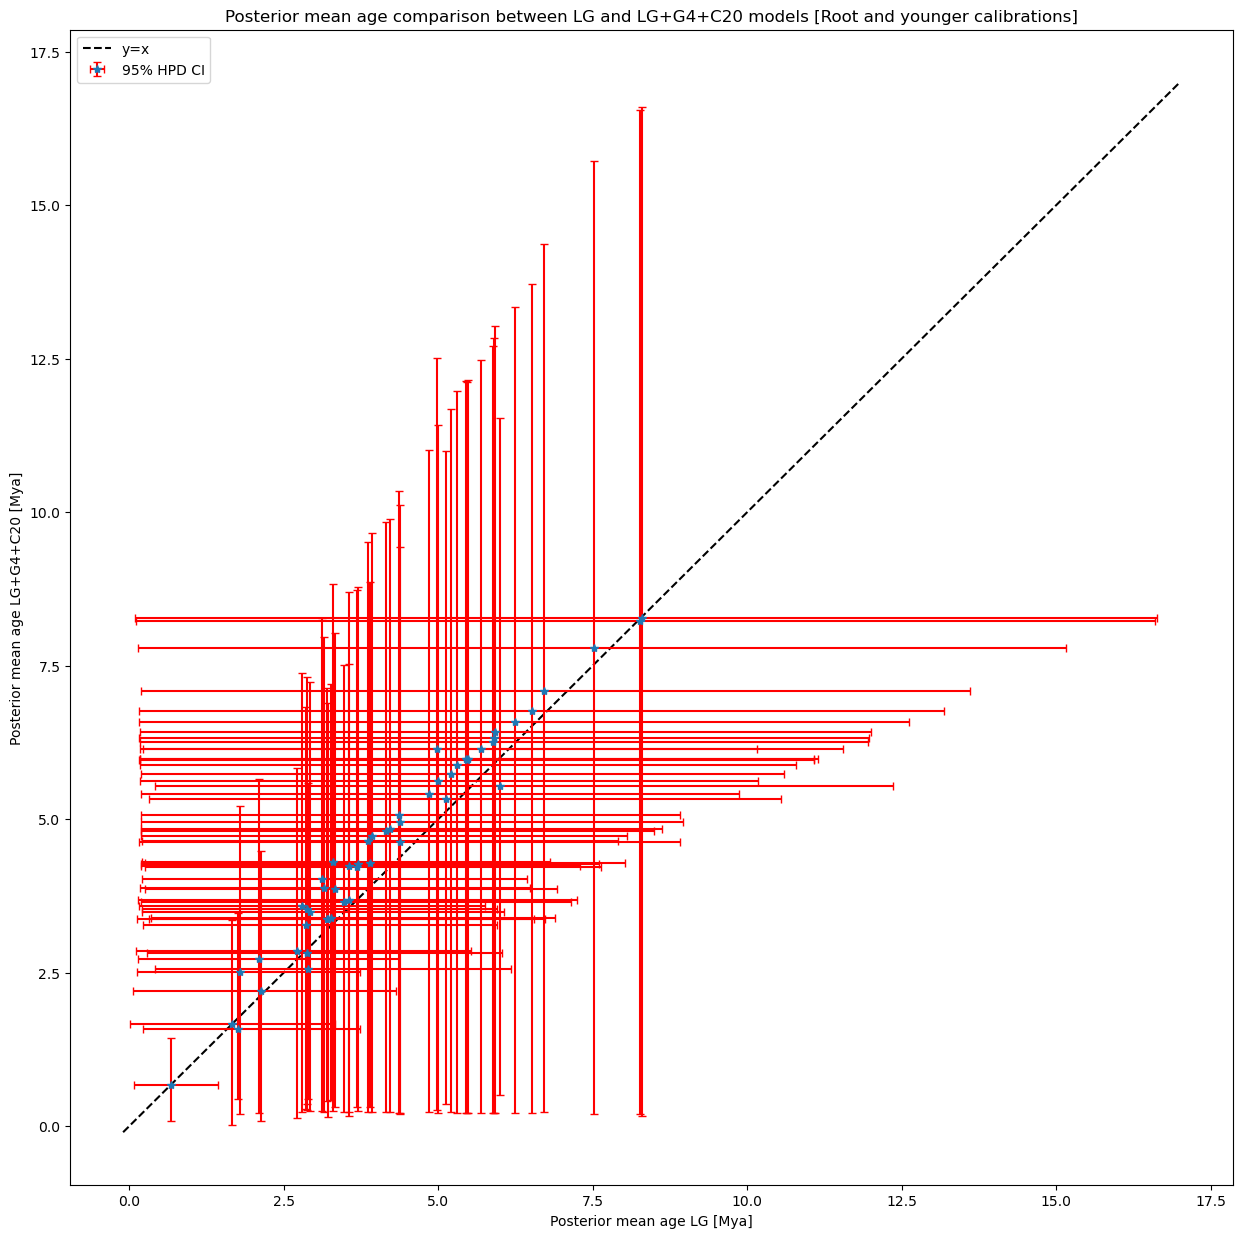

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root and younger calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_ry.png')

In [11]:
posterior_mean_baseml

[8.2968,
 8.2701,
 7.5241,
 6.5162,
 6.2349,
 5.9091,
 5.4611,
 2.8722,
 4.3817,
 3.5549,
 3.2102,
 2.7078,
 2.1237,
 1.6556,
 0.6802,
 3.4785,
 5.9166,
 4.9765,
 5.3061,
 3.8897,
 3.3338,
 3.2023,
 5.8918,
 5.4807,
 5.2043,
 4.842,
 4.3838,
 4.1529,
 3.5526,
 3.1517,
 2.7918,
 2.1026,
 1.7954,
 3.7022,
 2.926,
 5.6894,
 1.7518,
 5.4508,
 4.999,
 4.3611,
 3.9325,
 2.8678,
 3.1145,
 4.2121,
 3.8545,
 3.3036,
 2.8633,
 3.6859,
 6.713,
 5.1274,
 3.2603,
 2.8837,
 5.9951]

In [12]:
posterior_mean_iqtree

[8.2682,
 8.2226,
 7.7919,
 6.7666,
 6.577,
 6.322,
 5.9615,
 2.8109,
 4.6222,
 3.6769,
 3.37,
 2.8476,
 2.1953,
 1.6611,
 0.674,
 3.6427,
 6.4214,
 6.1366,
 5.8815,
 4.2828,
 3.8596,
 3.3718,
 6.2554,
 5.9755,
 5.7411,
 5.4037,
 4.9551,
 4.8076,
 4.2367,
 3.8774,
 3.5799,
 2.7243,
 2.5056,
 4.2737,
 3.4899,
 6.1458,
 1.5829,
 5.9736,
 5.616,
 5.0681,
 4.7216,
 3.528,
 4.0184,
 4.8377,
 4.6477,
 4.2972,
 3.2813,
 4.2189,
 7.0888,
 5.3251,
 3.3909,
 2.5576,
 5.5361]

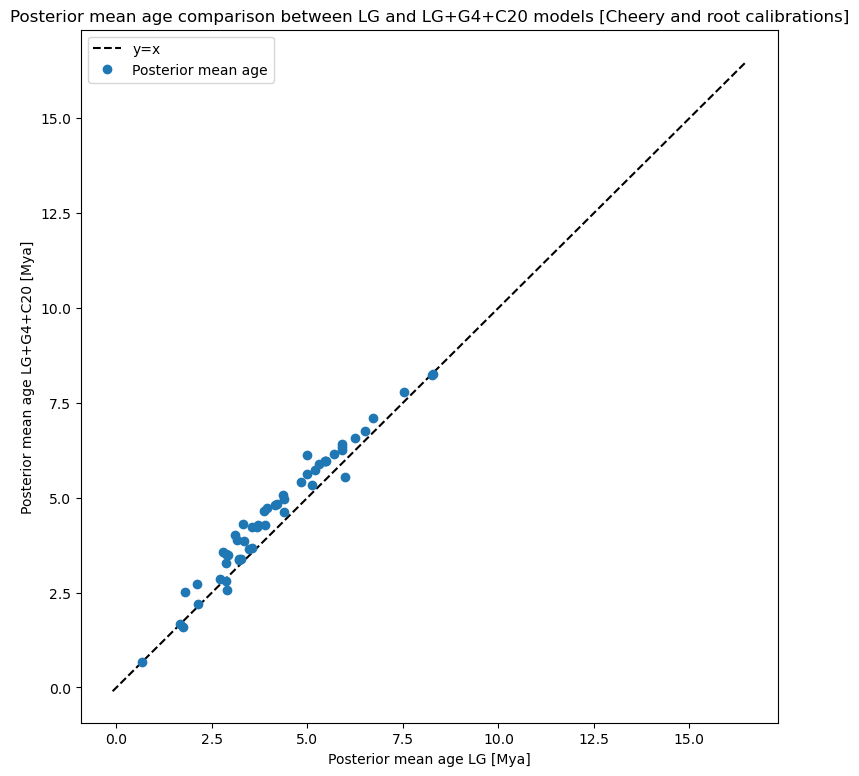

In [15]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Cheery and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_ry_scatter.png')

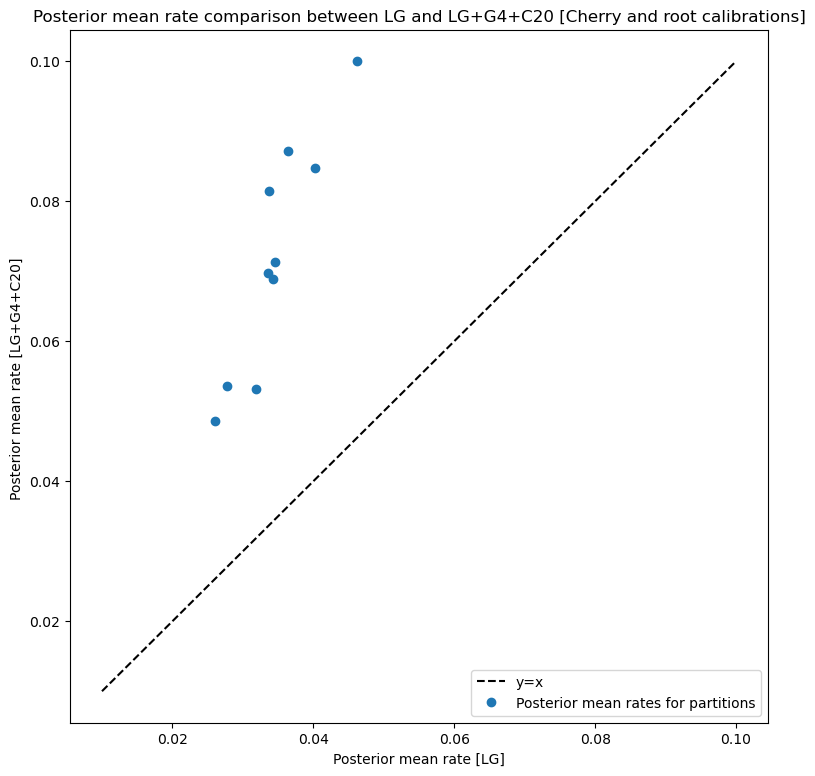

In [16]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.1], 
        [0.01, 0.1], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4+C20] ')
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C20 [Cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_C20_cr_scatter.png')